In [1]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import copy, time, sys
import random
import pickle
from tqdm import tqdm

import mlrfit as mf

/Users/parshakova.tanya/opt/anaconda3/envs/routing/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
np.random.seed(1001)
random.seed(1001)

In [3]:
rank = 28
mtype = "dgt_hodlr"


with open("../outputs/hpart_uni_fiedler_allL.pickle", "rb") as f:
       hpart = pickle.load(f)

with open("../outputs/matrix_fiedler_allL.pickle", "rb") as f:
       A = pickle.load(f)

m = n = A.shape[0]

A1 = mf.dgt_matrix(m, n, d=3, k=5)
print(f"{mf.rel_diff(A, A1)=}, {np.allclose(A, A1)=}")

symm = np.allclose(A, A.T) if m==n else False
if symm:
       print(f"MLR storage = {rank * m}")
else:
       print(f"MLR storage = {rank * (m + n)}")

mlr_storage = rank * (m + n)

mf.rel_diff(A, A1)=3.613205208961451, np.allclose(A, A1)=False
MLR storage = 140000


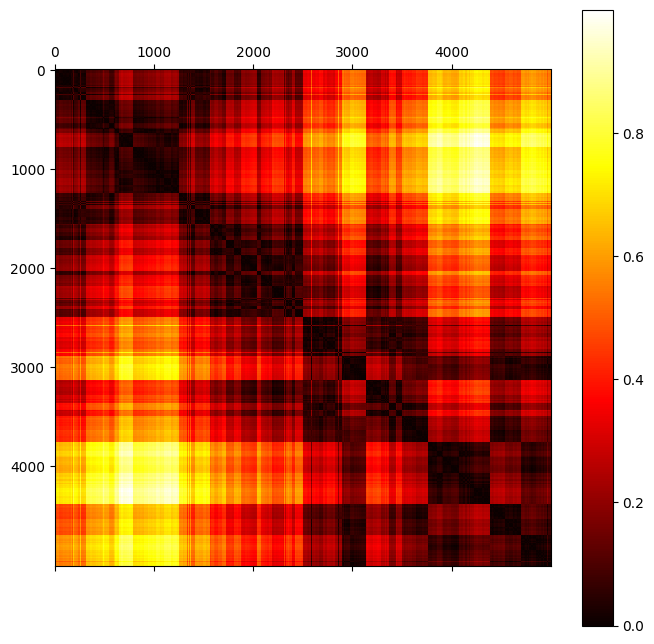

In [23]:
perm_A = A[hpart['rows']['pi'], :][:, hpart['cols']['pi']]
fig = plt.figure(figsize=(8, 8), dpi=100)
ax = fig.add_subplot(111)
cax = ax.matshow(perm_A, cmap='hot')
fig.colorbar(cax)
plt.show()

In [5]:
assert m == hpart['rows']['pi'].size and n == hpart['cols']['pi'].size
for level in range(len(hpart['rows']['lk'])):
    avg_rows = np.diff(np.array(hpart['rows']['lk'][level])).mean()
    avg_cols = np.diff(np.array(hpart['cols']['lk'][level])).mean()
    print(f"{level=}, {hpart['rows']['lk'][level].size-1}, {avg_rows=}, {avg_cols=}")

level=0, 1, avg_rows=5000.0, avg_cols=5000.0
level=1, 2, avg_rows=2500.0, avg_cols=2500.0
level=2, 4, avg_rows=1250.0, avg_cols=1250.0
level=3, 8, avg_rows=625.0, avg_cols=625.0
level=4, 16, avg_rows=312.5, avg_cols=312.5
level=5, 32, avg_rows=156.25, avg_cols=156.25
level=6, 64, avg_rows=78.125, avg_cols=78.125
level=7, 128, avg_rows=39.0625, avg_cols=39.0625
level=8, 256, avg_rows=19.53125, avg_cols=19.53125
level=9, 512, avg_rows=9.765625, avg_cols=9.765625
level=10, 1024, avg_rows=4.8828125, avg_cols=4.8828125
level=11, 2048, avg_rows=2.44140625, avg_cols=2.44140625
level=12, 4096, avg_rows=1.220703125, avg_cols=1.220703125
level=13, 5000, avg_rows=1.0, avg_cols=1.0


In [6]:
rel_tol  = 4.55e-6
tol = rel_tol * np.linalg.norm(A, ord='fro')
tol

0.009356407295636813

In [7]:
A_HODLR, A_HODLR_fillin, bl_sizes, count = mf.build_hodlr(hpart, m, n, A, tol)

100%|██████████| 14/14 [00:30<00:00,  2.18s/it]


In [8]:
np.histogram(A_HODLR_fillin.reshape(-1), bins=5)

(array([       0,        0, 25000000,        0,        0]),
 array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5]))

In [9]:
# assert (A_HODLR == 0).sum() == 0, print((A_HODLR == 0).sum())

In [10]:
hodlr_storage = mf.get_hodlr_storage(bl_sizes, count, m, n)

In [11]:
np.histogram(bl_sizes[:, 0])

(array([7762, 6620,    0,  426,    0,  130,   50,    0,    6,    4]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]))

In [12]:
print(f"{rel_tol=},   err={mf.rel_diff(A_HODLR, den=A)},   {hodlr_storage=}")
# rel_tol=0.005546875,   err=0.028642376440277055,   hodlr_storage=80626
# rel_tol=0.0005,        err=0.004328726489613146,   hodlr_storage=142692
# rel_tol=0.00025,   err=0.002947978128354944,   hodlr_storage=155370
# rel_tol=0.0001,   err=0.0015059492588108449,   hodlr_storage=182344
# rel_tol=4e-05,   err=0.0007590153970787168,   hodlr_storage=210020
# rel_tol=5e-06,   err=0.00013899644024968654,   hodlr_storage=271174
# rel_tol=4.6e-06,   err=0.00012953470363517868,   hodlr_storage=274454
# rel_tol=4.58e-06,   err=0.00012937158414838166,   hodlr_storage=274464
# rel_tol=4.55e-06,   err=0.00012824477708336826,   hodlr_storage=274668
# rel_tol=4.5e-06,   err=0.00012680844563648237,   hodlr_storage=274786
# rel_tol=4.3e-06,   err=0.00012194933072316428,   hodlr_storage=275516
# rel_tol=4.1e-06,   err=0.00011715418046481784,   hodlr_storage=277324
# rel_tol=4e-06,   err=0.00011422235442445688,   hodlr_storage=278166
# rel_tol=3.9e-06,   err=0.00011177339365552112,   hodlr_storage=278942
# rel_tol=3.8e-06,   err=0.0001102663728217579,   hodlr_storage=279488
# rel_tol=3.7e-06,   err=0.00010770774193302746,   hodlr_storage=280380
# rel_tol=3.6e-06,   err=0.00010627136565604852,   hodlr_storage=280666
# rel_tol=3.4e-06,   err=0.00010196366904393658,   hodlr_storage=282540
# rel_tol=3e-06,   err=9.045308635993199e-05,   hodlr_storage=286860
# rel_tol=1e-06,   err=3.2854884344928166e-05,   hodlr_storage=317330

rel_tol=4.55e-06,   err=0.00012824477708336826,   hodlr_storage=274668


In [13]:
(3.6e-6 + 3.8e-6)/2

3.7e-06

In [14]:
print(f"{hodlr_storage/2.=}")
print(f"  {mlr_storage/2.=}")
print(f"       {m * n =}")
mlr_storage * 1./ hodlr_storage

hodlr_storage/2.=137334.0
  mlr_storage/2.=140000.0
       m * n =25000000


1.0194125271236547

In [15]:
# LR             0.0019880716166353566
# LR+D           0.002080837904970914
# RA uniform     0.00012841450898444602
# RA bottom      0.0009961650885605793
# RA top         0.00054760892930406

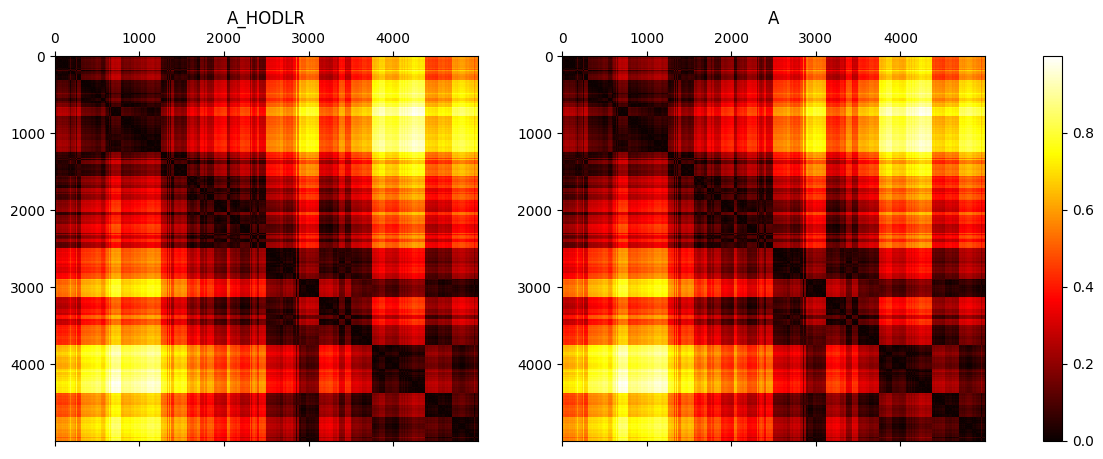

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), dpi=100)
vmin = min(A.min(), A_HODLR.min())
vmax = max(A.max(), A_HODLR.max())

cax1 = axs[0].matshow(A_HODLR[hpart['rows']['pi'], :][:, hpart['cols']['pi']], cmap='hot', aspect='auto', vmin=vmin, vmax=vmax)
axs[0].set_title('A_HODLR')
perm_A = A[hpart['rows']['pi'], :][:, hpart['cols']['pi']]
cax2 = axs[1].matshow(perm_A, cmap='hot', aspect='auto', vmin=vmin, vmax=vmax)
axs[1].set_title('A')

fig.colorbar(cax1, ax=axs, orientation='vertical')
plt.show()

In [17]:
a_diags = []
for level in [-1, -2, -3]:
    num_blocks = len(hpart['rows']['lk'][level]) - 1
    a_diags += [np.zeros((m, n))]
    for i, block in enumerate(range(num_blocks)):
        r1, r2 = hpart['rows']['lk'][level][block], hpart['rows']['lk'][level][block+1]
        c1, c2 = hpart['cols']['lk'][level][block], hpart['cols']['lk'][level][block+1]
        a_diags[-1][r1:r2, c1:c2] = 2*np.ones((r2-r1, c2-c1))

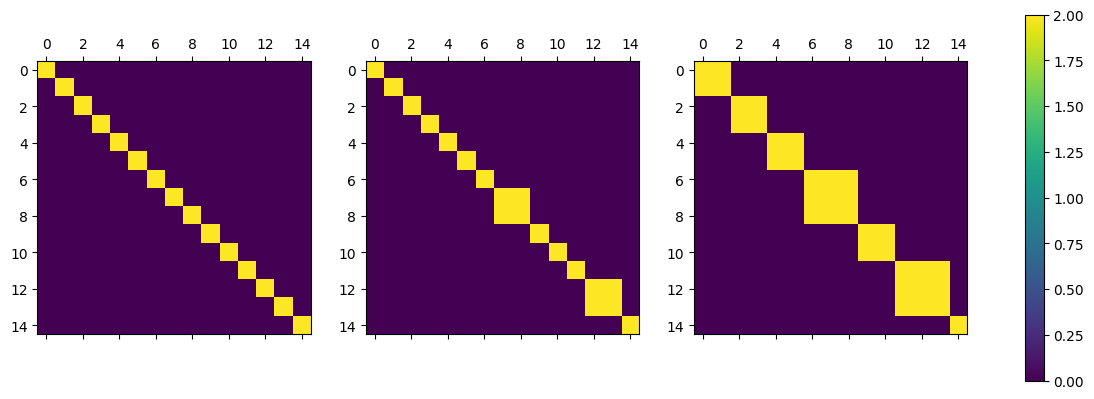

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
max_el = 15
cax1 = axs[0].matshow(a_diags[0][:max_el, :max_el], cmap='viridis')
cax2 = axs[1].matshow(a_diags[1][:max_el, :max_el], cmap='viridis')
cax3 = axs[2].matshow(a_diags[2][:max_el, :max_el], cmap='viridis')

cbar = fig.colorbar(cax2, ax=axs.ravel().tolist(), shrink=0.95)
plt.show()